In [6]:
import pandas as pd
import sqlite3
import openpyxl
from datetime import datetime

In [3]:

conn = sqlite3.connect('database.db')

df = pd.read_excel('train.xlsx', engine='openpyxl')

df.to_sql('your_table', conn, if_exists='replace', index=False)

conn.close()

In [24]:
import matplotlib.pyplot as plt

In [63]:
con = sqlite3.connect('database.db')

In [64]:
query = """SELECT  strftime('%m', t.[Дата бронирования]) as month_brony, strftime('%m', t.[Дата отмены]) as month_otmena, count(*) as count_ from your_table t
            where t.[Статус брони] = 'Отмена'
            group by  strftime('%m', t.[Дата бронирования]), strftime('%m', t.[Дата отмены])
            order by count(*) desc"""
df_one = pd.read_sql_query(query, con)

query = """-- посчитать отмены по месяцам
            SELECT  strftime('%m', t.[Дата отмены]) month_otmena, count(*)  count_ from your_table t
            where t.[Статус брони] = 'Отмена'
            group by  strftime('%m', t.[Дата отмены])
            order by count(*) desc"""
df_two = pd.read_sql_query(query, con)

query = """--КАКИЕ НОМЕРА ЧАЩЕ ВСЕГО ОТМЕНЯЛИ
            SELECT t.[Категория номера], count(*) count_ from your_table t
            where t.[Статус брони] = 'Отмена'
            group by t.[Категория номера]"""
df_three = pd.read_sql_query(query, con)

con.close()

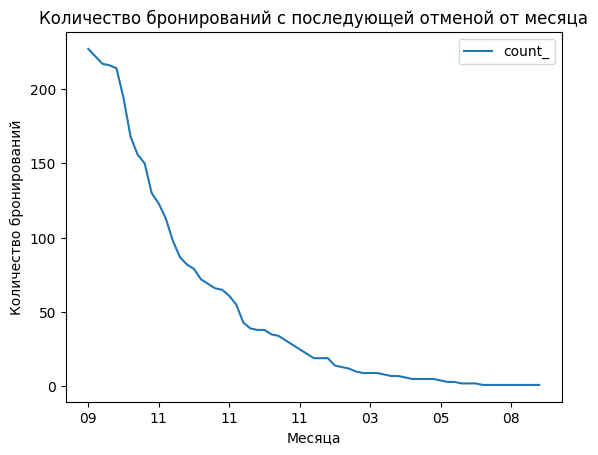

In [74]:
df_one.plot(x='month_brony', y='count_')
plt.title('Количество бронирований с последующей отменой от месяца')
plt.xlabel('Месяца')
plt.ylabel('Количество бронирований')
plt.show()

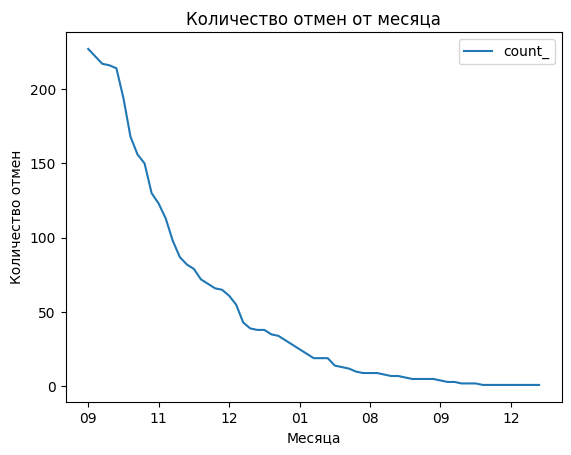

In [73]:
df_one.plot(x='month_otmena', y='count_')
plt.title('Количество отмен от месяца')
plt.xlabel('Месяца')
plt.ylabel('Количество отмен')
plt.show()

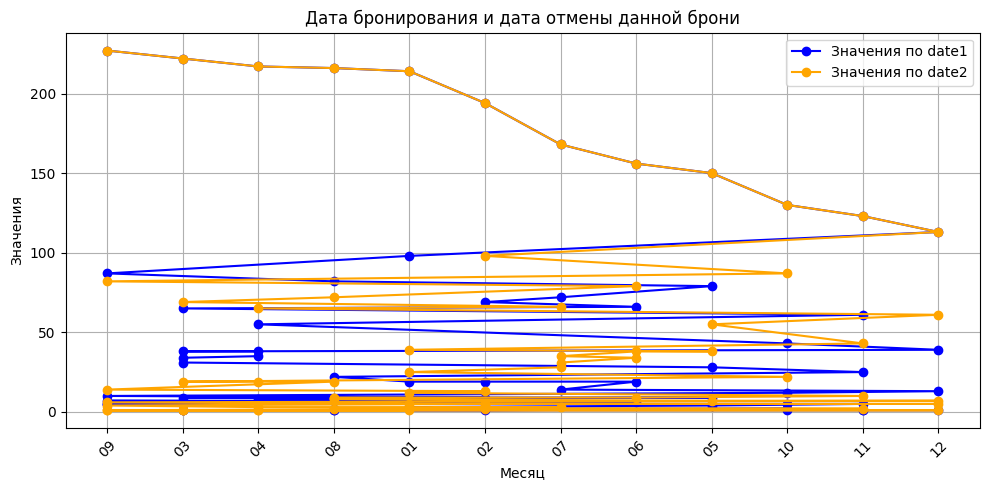

In [72]:
plt.figure(figsize=(10, 5))  # Устанавливаем размер графика

# График для первой даты
plt.plot(df_one['month_brony'], df_one['count_'], marker='o', label='Значения по date1', color='blue')

# График для второй даты
plt.plot(df_one['month_otmena'], df_one['count_'], marker='o', label='Значения по date2', color='orange')

# Настройки графика
plt.title('Дата бронирования и дата отмены данной брони')
plt.xlabel('Месяц')                   
plt.ylabel('Значения')               
plt.xticks(rotation=45)               
plt.grid(True)                      
plt.legend()
plt.tight_layout()

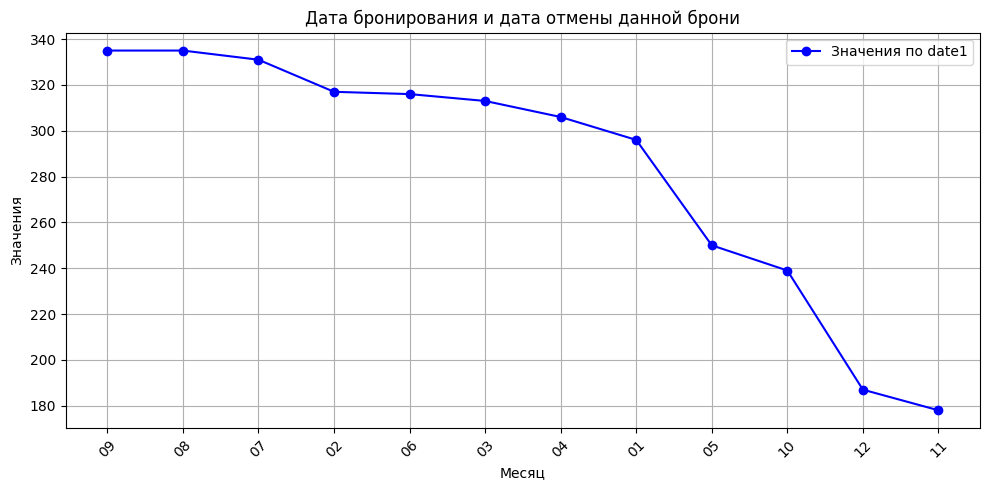

In [61]:
plt.figure(figsize=(10, 5))  # Устанавливаем размер графика

# График для первой даты
plt.plot(df_two['month_otmena'], df_two['count_'], marker='o', label='Значения по date1', color='blue')

# Настройки графика
plt.title('Количество отмен по меясцам')
plt.xlabel('Месяц')                   
plt.ylabel('Значения')               
plt.xticks(rotation=45)               
plt.grid(True)                      
plt.legend()
plt.tight_layout()

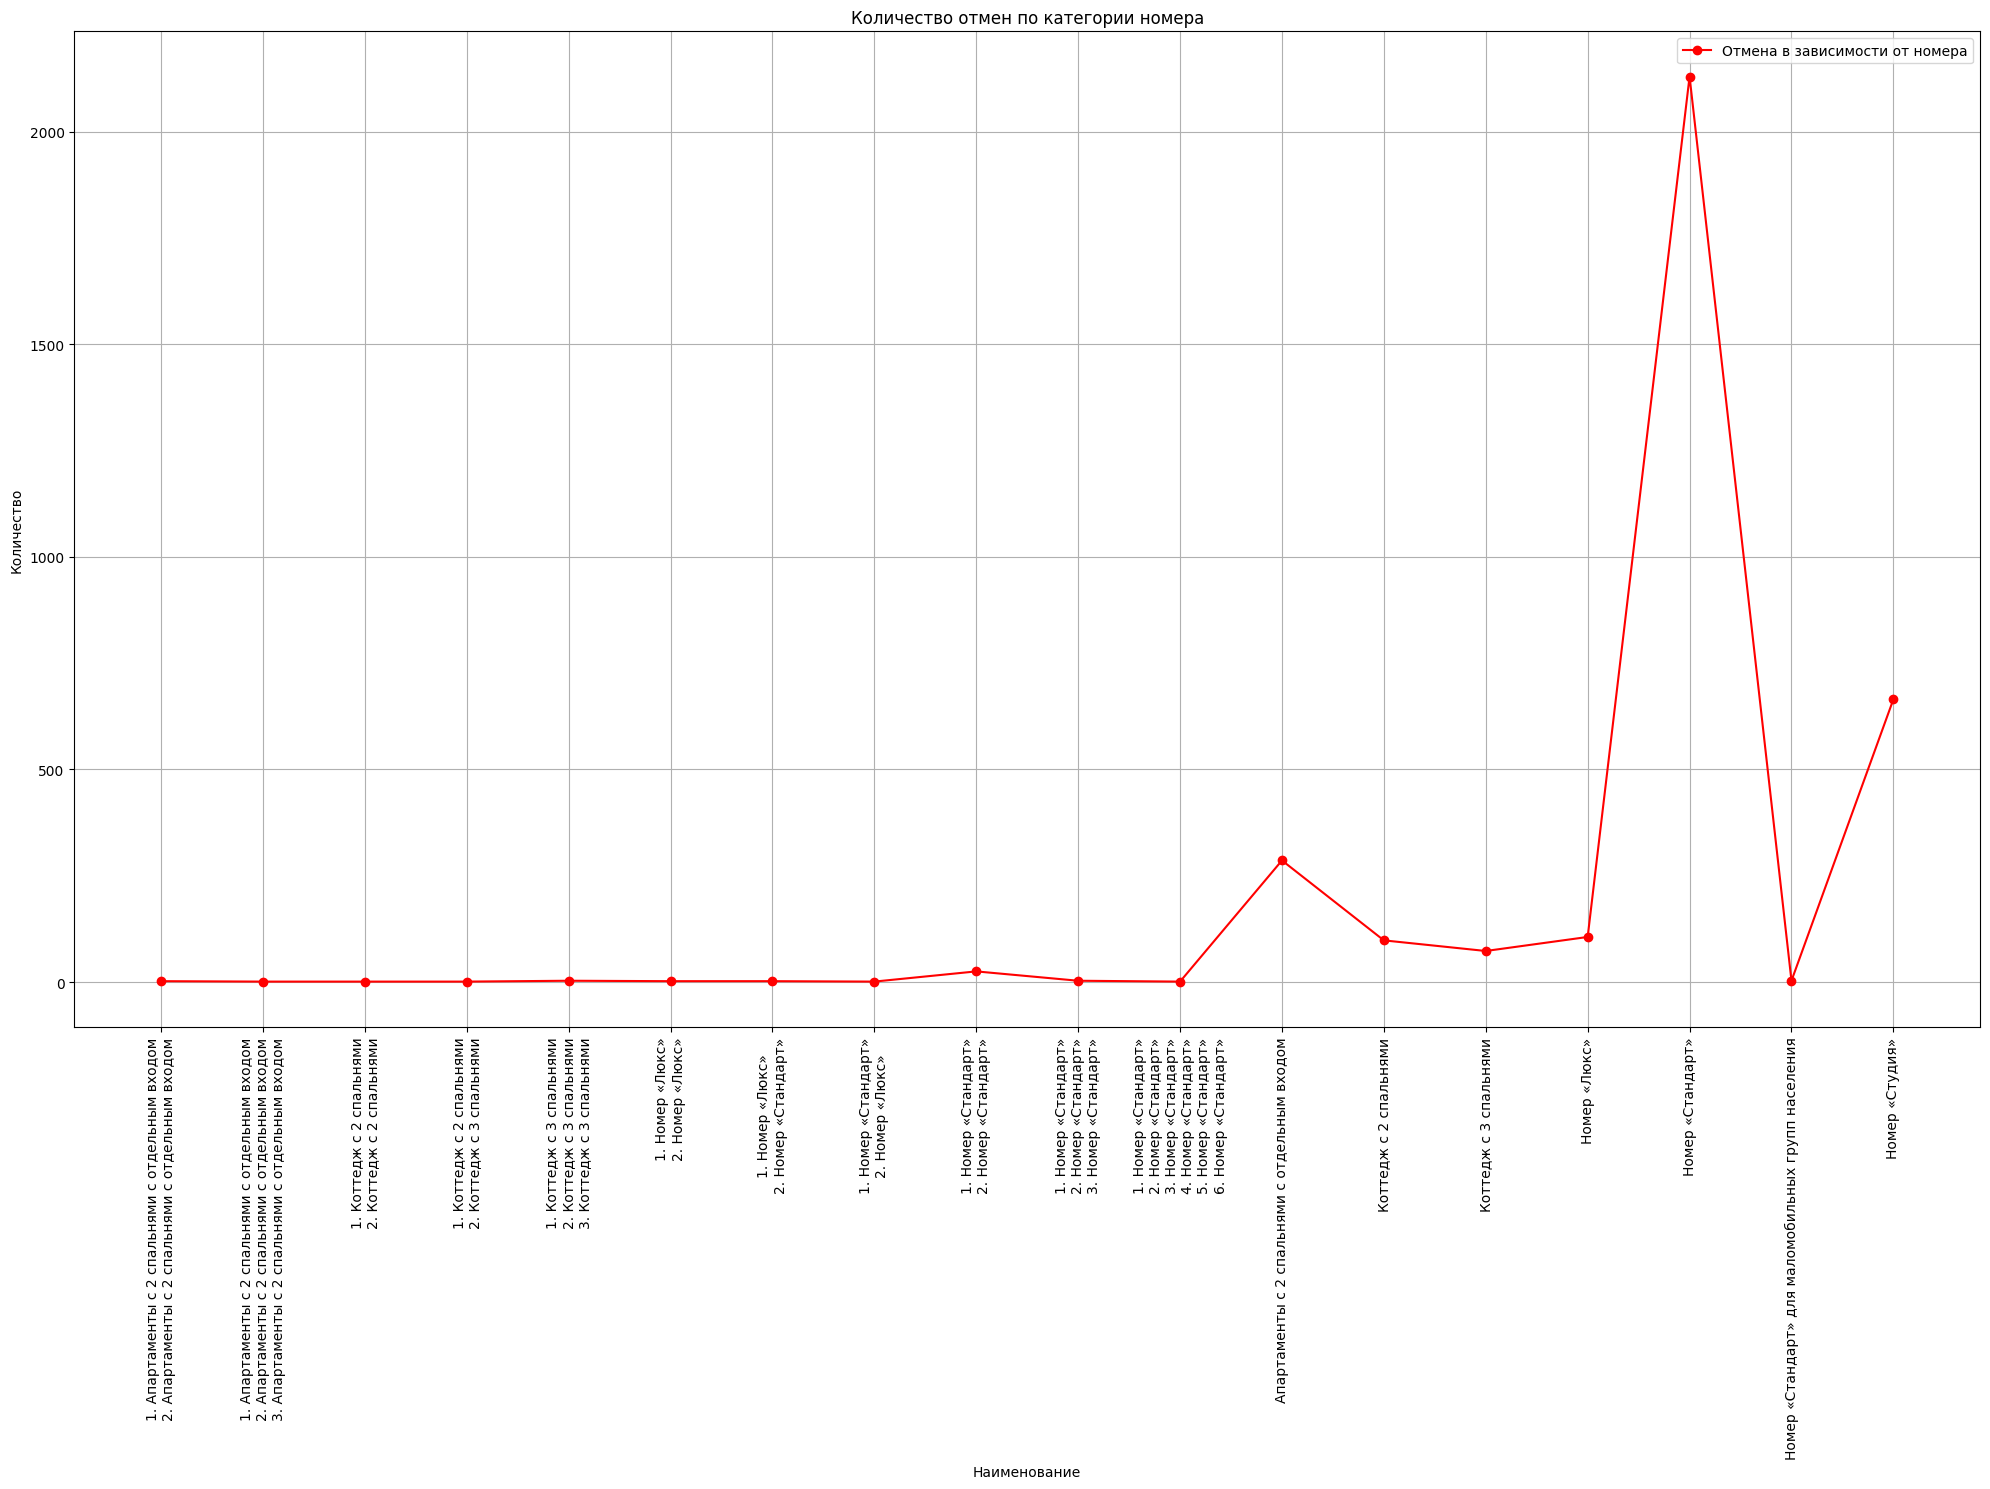

In [71]:
plt.figure(figsize=(20, 15))  # Устанавливаем размер графика

# График для первой даты
plt.plot(df_three['Категория номера'], df_three['count_'], marker='o', label='Отмена в зависимости от номера', color='red')

# Настройки графика
plt.title('Количество отмен по категории номера')
plt.xlabel('Наименование')                   
plt.ylabel('Количество')               
plt.xticks(rotation=90)            
plt.grid(True)                      
plt.legend()
plt.tight_layout()